# Profiling and Analysis Questions


Clustering
https://web.ist.utl.pt/rmch/dash/guides/Clustering%20in%20Python.html


- what are the top aisle purchase clusters?
- what are the most common timeframe order time clusters (order_dow, order_hour_of_day,days_since_prior_order and weeks_since_prior_order) ?

PCA Resources
- https://www.kaggle.com/code/asindico/customer-segments-with-pca
- https://www.datacamp.com/tutorial/principal-component-analysis-in-python
- https://www.youtube.com/watch?v=8klqIM9UvAc
- https://www.youtube.com/watch?v=FD4DeN81ODY
- https://www.youtube.com/watch?v=HMOI_lkzW08

Clustering resources
- https://github.com/jrkreiger/instacart-analysis/blob/master/instacart-analysis.ipynb
- https://medium.com/towards-data-science/customer-segmentation-using-the-instacart-dataset-17e24be9c0fe


Other resources
- https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-instacart

# NOTAS PROF
- EXPERIMENTAR DBSCAN
- ADICIONAR E VALIDAR CENTROIDES

# File and libraries

In [6]:
import pandas as pd
import numpy as np


filepath=r'data/citi_bike_data_prep_encoded.csv'

file_tag = "Citi Bike"


## DSLabs

In [7]:
%run "scripts/dslabs_functions.py"

dslabs_functions lodaded


# data functions

In [4]:
%run "scripts/data_functions.py"

dslabs_functions lodaded
data_functions lodaded


# Load

In [10]:
test_data = True
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)

#id_cols=['ride_id','start_time', 'end_time','start_station','end_station','start_station_id','end_station_id','start_lat','start_lng', 'end_lat', 'end_lng','wmo_weather_code','snowfall_cm','ride_duration_sec']
#remove also col = 'snowfall_cm' because it has only 0 values in our dataset
#remove also start_station and end_Station = they have too many unique values(around 2k) which will make the encoding process very slow

#df=df.drop(columns=id_cols, axis=1)

df.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 4790 entries, 1250167 to 1126372
Data columns (total 39 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   bike_type                           4790 non-null   int64  
 1   user_type                           4790 non-null   int64  
 2   day_of_month                        4790 non-null   int64  
 3   is_weekend                          4790 non-null   int64  
 4   ride_duration_min                   4790 non-null   float64
 5   temperature_2m                      4790 non-null   float64
 6   rain_mm                             4790 non-null   float64
 7   cloud_cover_low_pct                 4790 non-null   int64  
 8   wind_speed_10m                      4790 non-null   float64
 9   ride_distance_km                    4790 non-null   float64
 10  ride_avg_speed                      4790 non-null   float64
 11  time_of_day_sin                     479

,bike_type,user_type,day_of_month,is_weekend,ride_duration_min,temperature_2m,rain_mm,cloud_cover_low_pct,wind_speed_10m,ride_distance_km,...,end_borough_Staten Island,wmo_weather_desc_Clear sky,wmo_weather_desc_Drizzle: Dense,wmo_weather_desc_Drizzle: Light,wmo_weather_desc_Drizzle: Moderate,wmo_weather_desc_Mainly clear,wmo_weather_desc_Overcast,wmo_weather_desc_Partly cloudy,wmo_weather_desc_Rain: Moderate,wmo_weather_desc_Rain: Slight
1250167,1,1,13,1,4.131533,11.2,0.0,40,25.6,1.080691,...,0,0,0,0,0,0,1,0,0,0
1097467,1,1,22,0,4.624800,13.9,0.0,3,12.5,0.842966,...,0,1,0,0,0,0,0,0,0,0
436416,1,1,20,1,2.581600,18.9,0.0,0,28.4,0.419195,...,0,0,0,0,0,0,0,1,0,0
1287612,1,1,19,0,5.920950,12.3,0.0,31,19.3,0.017876,...,0,0,0,0,0,0,1,0,0,0
2842851,1,1,28,1,14.362317,17.5,0.0,16,5.6,3.353950,...,0,0,0,0,0,0,1,0,0,0
3025076,0,1,27,1,47.228467,13.8,0.0,0,17.7,9.459594,...,0,0,0,0,0,0,1,0,0,0
1327779,0,1,29,0,7.460250,14.3,0.0,0,15.5,1.723450,...,0,0,0,0,0,1,0,0,0,0
1436022,1,1,18,0,7.868300,9.1,0.0,94,19.2,2.225601,...,0,0,0,0,0,0,1,0,0,0
253374,1,1,23,0,10.524100,14.3,0.0,0,26.8,2.964649,...,0,1,0,0,0,0,0,0,0,0
2839747,1,0,5,0,5.530733,9.2,0.0,15,28.2,0.782740,...,0,0,0,0,0,0,1,0,0,0


# Clustering Data Prep

# K MEANS clustering

## Elbow Method Study

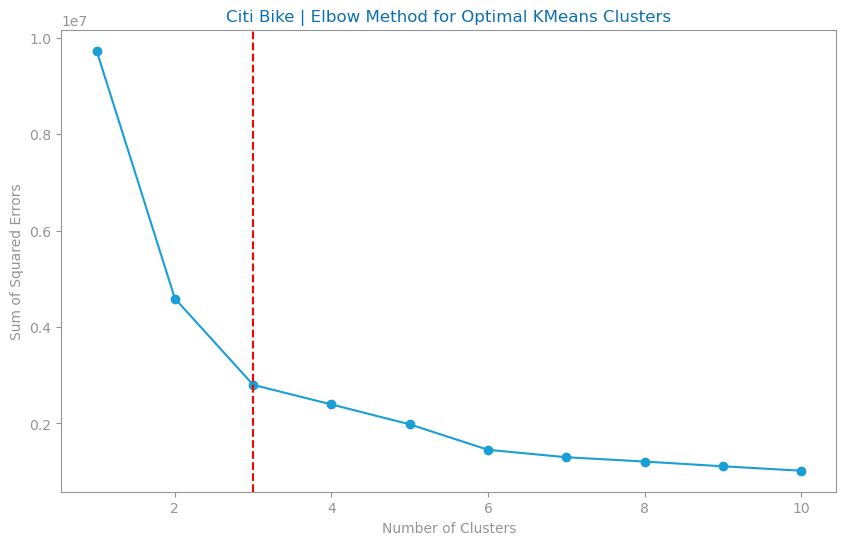

Optimal number of clusters (Elbow Method): 3


In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator

# Define the range of clusters to evaluate
range_n_clusters = list(range(1, 11))

# Initialize an empty list to store the sum of squared distances
sse = []

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Determine the elbow point using KneeLocator
kneedle = KneeLocator(range_n_clusters, sse, curve='convex', direction='decreasing')
elbow_point = kneedle.elbow

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sse, marker='o')
plt.title(f'{file_tag} | Elbow Method for Optimal KMeans Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')

# Add a vertical line at the elbow point
plt.axvline(x=elbow_point, color='r', linestyle='--')

plt.show()

# Print the Optimal K After Elbow Method
print(f"Optimal number of clusters (Elbow Method): {elbow_point}")

## Kmeans model

In [16]:
# Clustering
from sklearn import cluster, mixture

# Starting from Scikit-learn 1.4, n_init='auto' is recommended for K-Means - it prevents future compatibility issues.

citibike_kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
citibike_y_pred_kmeans = citibike_kmeans.fit_predict(df)

citibike_kmeans.cluster_centers_

array([[ 6.55704528e-01,  8.12294460e-01,  1.73622565e+01,
         3.06602580e-01,  1.29245949e+01,  1.35324564e+01,
         5.16822666e-02,  4.73513787e+00,  1.49586137e+01,
         2.05872702e+00,  1.10181412e+01, -3.07606881e-02,
        -8.98659246e-02,  1.51729320e-01,  6.75307361e-02,
        -3.10102707e-01, -3.06305591e-01,  2.85858841e-02,
         2.71945358e-01,  0.00000000e+00,  6.43814824e-01,
         5.56539337e-02,  0.00000000e+00,  2.93448014e-02,
         2.75739944e-01,  0.00000000e+00,  0.00000000e+00,
         6.42296990e-01,  5.26182646e-02,  0.00000000e+00,
         3.32152795e-01,  3.79458639e-03,  5.28712370e-02,
         2.40323805e-02,  1.05995446e-01,  3.92107260e-01,
         7.66506451e-02,  1.34441069e-17,  1.23956489e-02],
       [ 6.63473054e-01,  8.55089820e-01,  1.16670659e+01,
         1.18562874e-01,  1.12689484e+01,  1.01401198e+01,
         1.90898204e-01,  9.08299401e+01,  1.65279042e+01,
         1.86252832e+00,  1.13805465e+01,  9.09712575e-

## Describe centroids


In [19]:
centroids = citibike_kmeans.cluster_centers_
feature_names = df.columns.tolist()

centroid_df = pd.DataFrame(centroids, columns=feature_names)

print("Cluster Centroids:")
print(centroid_df)

Cluster Centroids:
   bike_type  user_type  day_of_month  is_weekend  ride_duration_min  \
0   0.655705   0.812294     17.362257    0.306603          12.924595   
1   0.663473   0.855090     11.667066    0.118563          11.268948   
2   0.500000   0.500000     14.000000    0.500000         959.442192   

   temperature_2m   rain_mm  cloud_cover_low_pct  wind_speed_10m  \
0       13.532456  0.051682             4.735138       14.958614   
1       10.140120  0.190898            90.829940       16.527904   
2        8.650000  0.000000            12.500000       10.650000   

   ride_distance_km  ...  end_borough_Staten Island  \
0          2.058727  ...                        0.0   
1          1.862528  ...                        0.0   
2          0.542340  ...                        0.0   

   wmo_weather_desc_Clear sky  wmo_weather_desc_Drizzle: Dense  \
0                3.321528e-01                         0.003795   
1               -3.885781e-16                         0.013174   


In [21]:
# show the clusters per instance
cluster_labels = citibike_kmeans.labels_
print("Cluster Labels:")
print(cluster_labels)
display(cluster_labels)

Cluster Labels:
[0 0 0 ... 0 0 0]


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

## Sillhouete study for kmeans

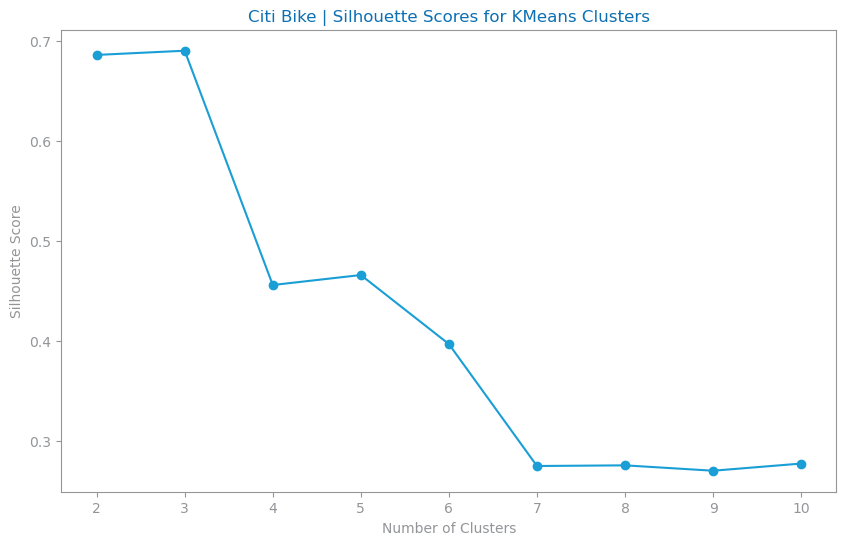

In [22]:
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

# Define the range of clusters to evaluate
range_n_clusters = list(range(2, 11))

# Initialize an empty list to store the silhouette scores
silhouette_scores = []

# Loop over the range of clusters
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title(f'{file_tag} | Silhouette Scores for KMeans Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [23]:
# Print the Best K After Silhouette Analysis

best_k = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters (Silhouette Score): {best_k}")

Optimal number of clusters (Silhouette Score): 3


# [prof] Plotting clustering solutions



In [ ]:
# Set up cluster parameters
plt.figure(figsize=(7, 6))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05, hspace=.01)
color_array = ['#377eb8','#ff7f00','#4daf4a','#f781bf','#a65628','#984ea3','#999999','#e41a1c','#dede00']
plot_num = 1
for k in range(len(datasets)):
    predictions = all_predictions[k]
    efficiency = all_efficiency[k]
    X, y = datasets[k][0]
    X = StandardScaler().fit_transform(X)
    
    for name in predictions:
        y_pred = predictions[name]
        plt.subplot(len(datasets), len(algorithms), plot_num)
        if k == 0: plt.title(name, size=10)
        colors = np.array(list(islice(cycle(color_array),int(max(y_pred) + 1))))
        colors = np.append(colors, ["#000000"]) #black color for outliers (if any)
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % efficiency[name]).lstrip('0'),
                 transform=plt.gca().transAxes,size=15,horizontalalignment='right')
        plot_num += 1

plt.show()


# Others: spectral, agglomerative, dbscan, model-based


# Cluster Visualization

## 1. Cluster Heatmap (For Feature Importance)
Another way to analyze clustering is by visualizing the centroid values for each feature.

Heatmap of Cluster Centroids: Helps interpret which features are important for each cluster.



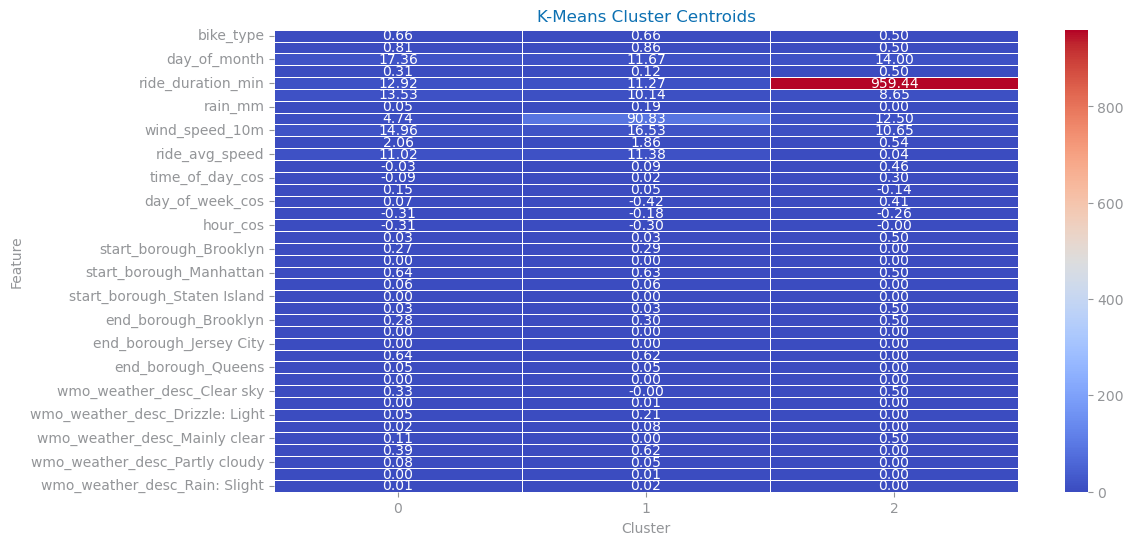

In [24]:
import seaborn as sns
import pandas as pd

# Create a dataframe of centroids
centroids = pd.DataFrame(citibike_kmeans.cluster_centers_, columns=df.columns)

# Plot a heatmap of feature values for each cluster
plt.figure(figsize=(12, 6))
sns.heatmap(centroids.T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("K-Means Cluster Centroids")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.show()


## 2. PCA visualization

In [30]:
from sklearn.decomposition import PCA

# Visualization
pca = PCA(n_components=5)
citibike_pca = pca.fit_transform(df)

citibike_df = pd.DataFrame(citibike_pca, columns=[f'PC{i+1}' for i in range(citibike_pca.shape[1])])
citibike_df.head()

,PC1,PC2,PC3,PC4,PC5
0,21.269058,-7.888851,-4.972775,8.358669,4.608586
1,-16.696454,-9.362631,4.899962,-0.869113,-0.118909
2,-19.209347,-11.490241,-0.884811,14.598692,-2.237752
3,11.500112,-6.084010,2.243504,5.479611,-8.621687
4,-5.084126,1.065264,14.288914,-5.469153,1.466592


### PCA  explained variance ratio

In [31]:
# Fit the PCA model
pca.fit(df)

# Explained variance ratio
explained_variance_reorder = pca.explained_variance_ratio_
print(f'Explained variance ratio: {explained_variance_reorder}')


Explained variance ratio: [0.59067982 0.32310451 0.03358995 0.02548489 0.01314536]


### 2D PCA Plot

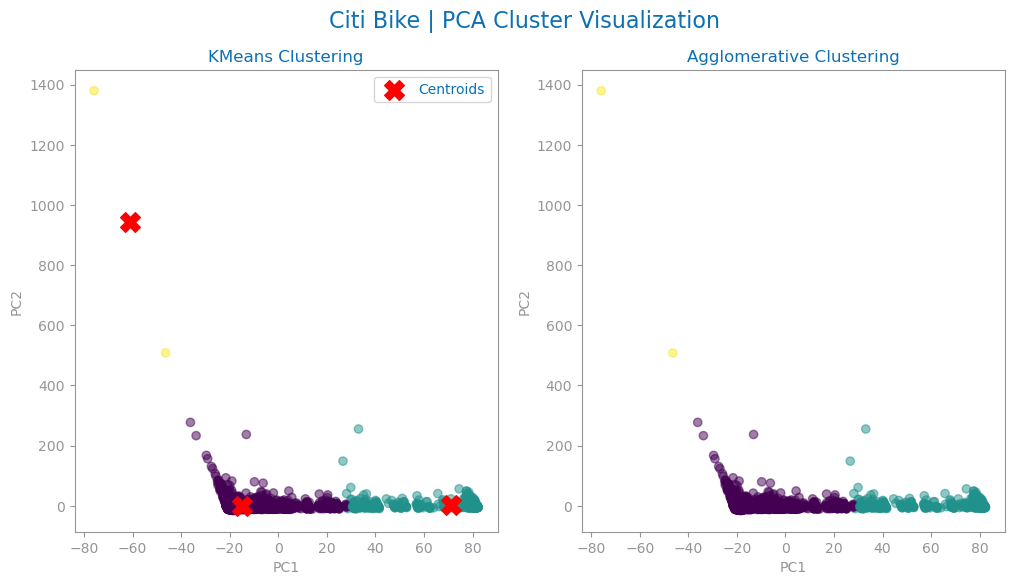

In [32]:
plt.figure(figsize=(12, 6))

# KMeans Clustering
plt.subplot(121)
plt.scatter(citibike_df['PC1'], citibike_df['PC2'], c=citibike_y_pred_kmeans, cmap='viridis', alpha=0.5)
kmeans_centroids = pca.transform(citibike_kmeans.cluster_centers_)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clustering')
plt.legend()

# Agglomerative Clustering
plt.subplot(122)
plt.scatter(citibike_df['PC1'], citibike_df['PC2'], c=citibike_y_pred_kmeans, cmap='viridis', alpha=0.5)
# Agglomerative clustering does not have centroids, so we skip this part
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering')

plt.suptitle(f"{file_tag} | PCA Cluster Visualization", fontsize=16)

plt.show()

### 3D PCA Plot

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

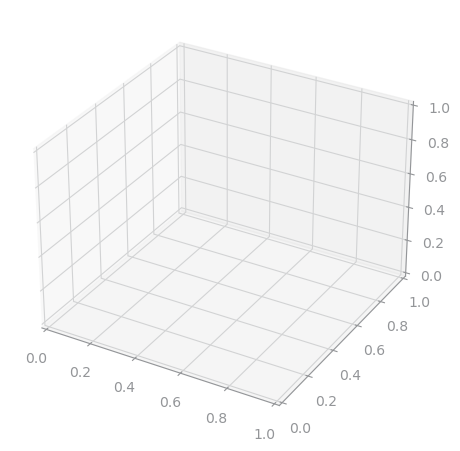

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 6))

# KMeans Clustering
ax = fig.add_subplot(121, projection='3d')
ax.scatter(citibike_df['PC1'], citibike_df['PC2'], citibike_y_pred_kmeans['PC3'], c=citibike_y_pred_kmeans, cmap='viridis', alpha=0.5)
kmeans_centroids_3d = pca.transform(citibike_df.cluster_centers_)

ax.scatter(kmeans_centroids_3d[:, 0], kmeans_centroids_3d[:, 1], kmeans_centroids_3d[:, 2], c='red', marker='X', s=200, label='Centroids')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('KMeans Clustering')
ax.legend()

# Agglomerative Clustering
ax = fig.add_subplot(122, projection='3d')
ax.scatter(citibike_df['PC1'], citibike_df['PC2'], citibike_df['PC3'], c=citibike_y_pred_kmeans, cmap='viridis', alpha=0.5)
# Agglomerative clustering does not have centroids, so we skip this part
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Agglomerative Clustering')

fig.suptitle(f"{file_tag} | PCA Cluster Visualization", fontsize=16)

plt.show()